In [1]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

Setting directories

In [3]:
import os
import numpy as np
base_dir = '/home/vplentz/Documentos/ml/begginer/deep/book/vision/catsndogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

Transforming input to the expected network input

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator( rescale=1./255, rotation_range=40, width_shift_range=0.2, 
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), 
                                                    batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory( validation_dir, target_size=(150, 150), 
                                                        batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Putting a classifier at the end

In [5]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

UNLOCKING the a convolution layer, so it can be trained as well

In [6]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [7]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, 
                              validation_data=validation_generator, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 94s 938ms/step - loss: 0.5626 - acc: 0.7080 - val_loss: 0.3448 - val_acc: 0.8590
Epoch 2/100
100/100 [==============================] - 79s 787ms/step - loss: 0.3957 - acc: 0.8175 - val_loss: 0.2596 - val_acc: 0.8920
Epoch 3/100
100/100 [==============================] - 79s 788ms/step - loss: 0.3118 - acc: 0.8630 - val_loss: 0.2239 - val_acc: 0.9010
Epoch 4/100
100/100 [==============================] - 79s 788ms/step - loss: 0.2891 - acc: 0.8670 - val_loss: 0.2179 - val_acc: 0.9060
Epoch 5/100
100/100 [==============================] - 79s 790ms/step - loss: 0.2729 - acc: 0.8860 - val_loss: 0.2088 - val_acc: 0.9200
Epoch 6/100
100/100 [==============================] - 82s 821ms/step - loss: 0.2363 - acc: 0.9000 - val_loss: 0.1801 - val_acc: 0.9150
Epoch 7/100
100/100 [==============================] - 83s 826ms/step - loss: 0.2310 - acc: 0.9010 - val_loss: 0.1945 - val_acc: 0.9180
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 78s 783ms/step - loss: 0.0425 - acc: 0.9850 - val_loss: 0.2826 - val_acc: 0.9290
Epoch 62/100
100/100 [==============================] - 78s 784ms/step - loss: 0.0429 - acc: 0.9845 - val_loss: 0.1878 - val_acc: 0.9370
Epoch 63/100
100/100 [==============================] - 78s 784ms/step - loss: 0.0494 - acc: 0.9805 - val_loss: 0.2863 - val_acc: 0.9250
Epoch 64/100
100/100 [==============================] - 78s 783ms/step - loss: 0.0393 - acc: 0.9835 - val_loss: 0.2996 - val_acc: 0.9250
Epoch 65/100
100/100 [==============================] - 78s 784ms/step - loss: 0.0373 - acc: 0.9875 - val_loss: 0.2188 - val_acc: 0.9400
Epoch 66/100
100/100 [==============================] - 78s 785ms/step - loss: 0.0321 - acc: 0.9880 - val_loss: 0.2076 - val_acc: 0.9410
Epoch 67/100
100/100 [==============================] - 78s 783ms/step - loss: 0.0313 - acc: 0.9905 - val_loss: 0.2089 - val_acc: 0.9400
Epoch 68/100
100/100 [===================

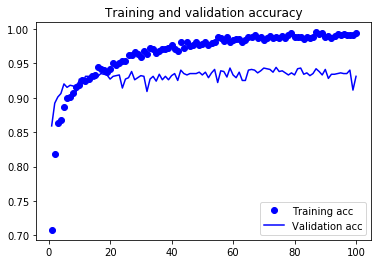

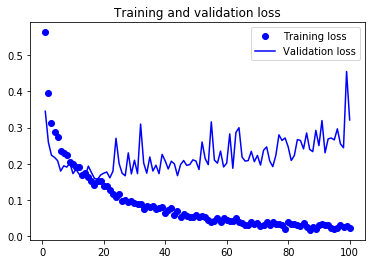

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

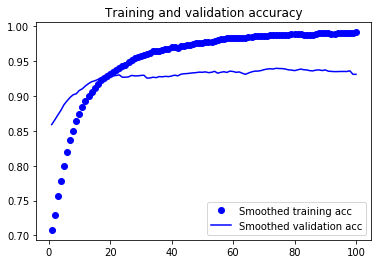

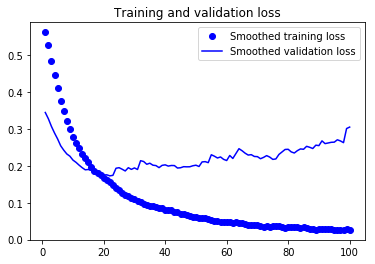

In [10]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
('test acc:', 0.9349999916553497)
